<a href="https://colab.research.google.com/github/jcfarese/MLA_JCF/blob/main/MLA4_JCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Jim Farese**  

## 1. Imports for Specific Models

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [30]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### 2. SVC Classification - Acquire Data

Load the banknote_authentication.csv into a data frame named df

In [8]:
#Load the banknote_authentication file into a data frame named df
df = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA4_JCF/banknote_authentication.csv')

#Sample of the first 5 entries
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### 3. Statistical and Visual Exploration

**You do not need this section for this notebook - you did this in last module's assignment**

### 4. Splitting Data into Train/Test

Create a data frame called X of your inputs that includes all columns except date and forgery

In [9]:
#Create a df called X with entries of all columns except forgery
X = df.drop(['forgery'], axis=1)

#Sample of the first 5 entries
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


Create a data frame called y of your output that includes only forgery This will be your target variable that you are trying to predict

In [10]:
#Create a df called y that only has forgery column
y = df['forgery']

Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test

In [11]:
#Split data to Train/Test and use 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Display the shape of the data frame
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1097, 4)
(275, 4)
(1097,)
(275,)


### 5. Building the Pipeline

Create a column transformer that will MinMax scale the numerical variables

In [12]:
#Create column transformer for MinMax numerical variables

#Identifies the numerical columns
numerical_columns = X.select_dtypes(include = ['number']).columns.tolist()

#Creates the column transformer
preprocessor = ColumnTransformer(transformers = [('num', MinMaxScaler(), numerical_columns)])

#Displays the transformer
preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['variance', 'skewness', 'curtosis',
                                  'entropy'])])

Create a pipeline that will transform the data and then run the DecisionTreeClassification algorithm

In [13]:
#Creates the pipeline and then runs a decision tree classification algorithm
pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                          ('classifier', DecisionTreeClassifier())])

#Displays the pipeline
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', DecisionTreeClassifier())])

### 6. Executing the Model

Run the pipeline to fit the DecisionTreeClassification model

In [14]:
#Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', DecisionTreeClassifier())])

### 7. Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred

In [15]:
#Run the pipeline to predict the y values from the dataset
y_pred = pipeline.predict(X_test)

#Display 5 predictions
y_pred[:5]

array([0, 0, 0, 0, 0])

Call the plot_cm function to generate the confusion matrix

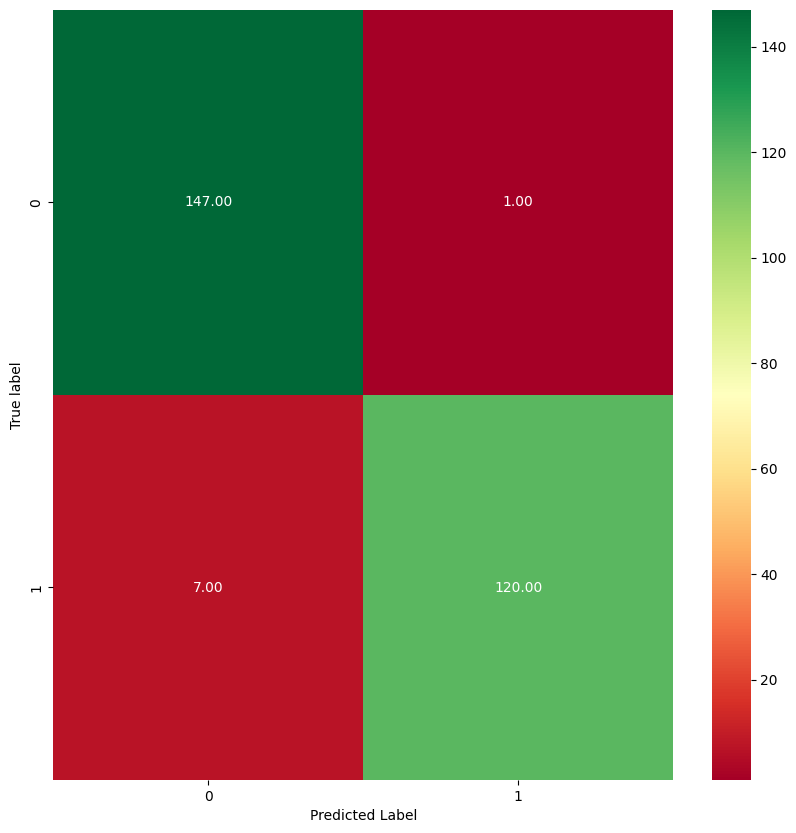

In [16]:
#Call the plot to create a confusion matrix
plot_cm(y_test, y_pred)

Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results

In [17]:
#Create a report for precision, recall, and F1 score
report = classification_report(y_test, y_pred)

#Display the report
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       148
           1       0.99      0.94      0.97       127

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



Interpertation

Non-Forgery
* Precision (.95): The model correctly predicted 95 % of all instances that it classified as non-forgeries

* Recall(.99): The model correctly identified 99% of the actual non-forgeries in the test data

&nbsp;

Forgery
* Precision (.99): The model correctly predicted 99% of all instances that it classified as forgeries

* Recall (.94): The model correctly identified 94% of the actual forgeries in the test data

&nbsp;

F1-Score:
* The F1-score is .97 for both non-forgeries and forgeries.  This indicates that the model maintains a good balance between precision and recall, making it highly effective at identifying both forged and genuine banknotes

&nbsp;

Overall Accuracy:
* The model has an overall accuracy of .97, meaning it correctly classified 97% of all instances in the testset.  This high accuracy, along with the high precision, recall, and F1-scores, suggest that the model is highly reliable for predicting whether a banknote is a forgery or not

### 8. Conclusion

In a Markdown comment, write a conclusion on how suitable you think this model is for predicting whether or not a banknote is a forgery

Conclusion

&nbsp;

The Decision Tree Classification model performs great for predictiong whether or not a banknote is a forgery. The model had an overall accuracy of 97% on the test set.

&nbsp;

* Precision:

* Non Forgery : 95%

* Forgery : 99%

&nbsp;

* Recall:

* Non Forgery: 99%

* Forgery: 94%

&nbsp;

The precision and recall are high for both classes meaning it is very reliable at determining if a banknote is forged or not

&nbsp;

F1 Score
* The model has high F1 scores with
  both classes of Non Forgery and Forgery of .97 for both.
  &nbsp;

* This indicates a great model with a  
  low chance of false positive and false negatives. The confusion matrix agrees with this with very low of both
  &nbsp;

* The model is very great at predicting  
  a forgery or not using variance, skewness, kurtosis, and entropy. The Decision Tree Classifier does a good job determining the coorelation between forgeries or non forgeries to the variables

## Problem 2

Now you are going to do an DecisionTree Regression to predict whether the usage in KWH for the steel industry data.  You should already have a copy of this data because you used it in a previous model. If you do not, I have attached a copy to this assignment

### 1. Acquire Data

Load the Steel_industry_data.csv into a data frame named df.

In [18]:
#Load the Steel_industry_data into a data frame named df
df = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA4_JCF/Steel_industry_data.csv')

#Sample of the first 5 entries
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


Rename the columns according to Table 1: Columns Names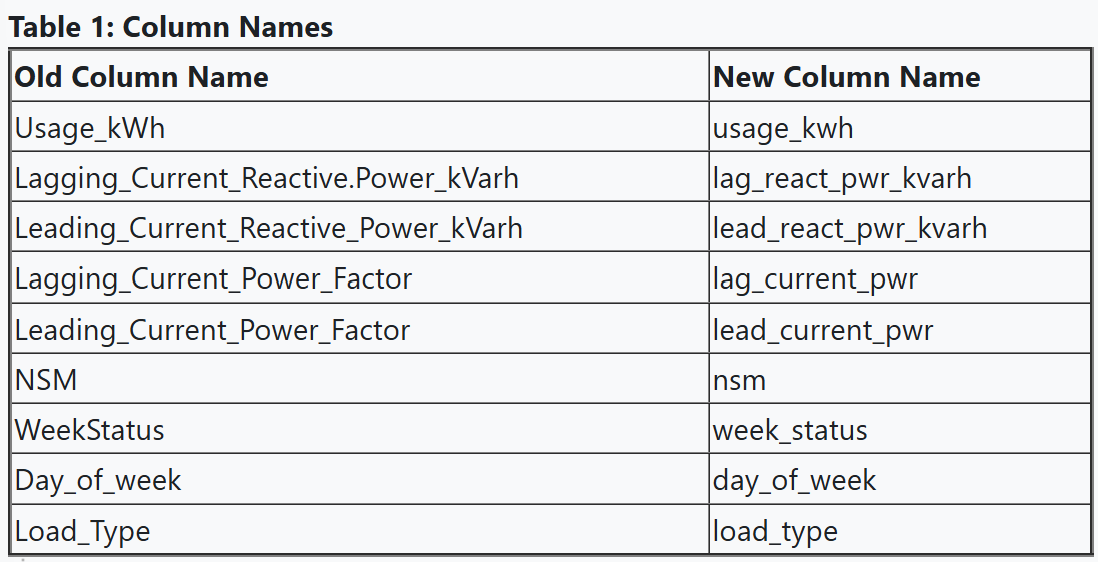


In [19]:
#Print Column names
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [20]:
#Rename the columns to match the table
df = df.rename(columns = {'Usage_kWh': 'usage_kwh',
                           'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
                           'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
                           'Lagging_Current_Power_Factor': 'lag_current_pwr',
                           'Leading_Current_Power_Factor': 'lead_current_pwr',
                           'NSM': 'nsm',
                           'WeekStatus': 'week_status',
                           'Day_of_week': 'day_of_week',
                           'Load_Type': 'load_type'})

In [21]:
#Verify name change of columns
df.columns

Index(['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type'],
      dtype='object')

### 2. Splitting Data into Train/Test

Create a data frame called X of your inputs that includes all columns except date and usage_kwh

In [22]:
#Create X dropping date and usage_kwh columns
X = df.drop(columns = ['date', 'usage_kwh'])

In [23]:
#Verify X columns
X.columns

Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status',
       'day_of_week', 'load_type'],
      dtype='object')

Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict

In [24]:
#Create the target variable
y = df['usage_kwh']

Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test

In [25]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
#Display the shape of the dataframe
print('X_train.shape is: ', X_train.shape)
print('X_test.shape is: ', X_test.shape)
print('y_train.shape is: ', y_train.shape)
print('y_test.shape is: ', y_test.shape)


X_train.shape is:  (28032, 9)
X_test.shape is:  (7008, 9)
y_train.shape is:  (28032,)
y_test.shape is:  (7008,)


### 3. Building the Pipeline

Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).

In [28]:
#Identify the categorical and numerical columns
categorical_columns = X.select_dtypes(include = ['object']).columns.tolist()
numerical_columns = X.select_dtypes(include = ['number']).columns.tolist()

#Create the column transformer
preprocessor = ColumnTransformer(transformers = [('cat', OneHotEncoder(), categorical_columns),
                                                 ('num', MinMaxScaler(), numerical_columns)])
#Display the column transformer
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['week_status', 'day_of_week', 'load_type']),
                                ('num', MinMaxScaler(),
                                 ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
                                  'CO2(tCO2)', 'lag_current_pwr',
                                  'lead_current_pwr', 'nsm'])])

Create a pipeline that will transform the data and then run the DecisionTreeRegression algorithm

In [31]:
#Create the pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                             ('regressor', DecisionTreeRegressor())])
#Display the pipeline
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('regressor', DecisionTreeRegressor())])

### 4. Executing the Model

Run the pipeline to fit the DecisionTreeRegression

In [32]:
#Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('regressor', DecisionTreeRegressor())])

### 5. Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred

In [33]:
#Run the pipeline to predict y from the data set and save them in y_pred
y_pred = pipeline.predict(X_test)

#Display the first 5 predictions
y_pred[:5]

array([  2.88,  60.91, 124.2 ,   3.13,  58.25])

Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive

In [35]:
#Calculate the root mean squared error for both train and test
train_rmse = np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Display the results
print('RMSE train: ', train_rmse)
print('RMSE test: ', test_rmse)

RMSE train:  1.8496745185288746e-16
RMSE test:  1.435605253167588


Interpretation of the Output

&nbsp;

The RMSE provides a measure of the models prediction error.  Lower is better, which means model predictions are closer to the actual values

&nbsp;

* Train RMSE: 1.8497*10^-16
Because the RMSE is so low for the training model, it indicates that the model fits the training data almost perfectly with little error.

* Test RMSE: 1.4356
The Test RMSE is slightly higher but still relatively low.  This means that the model performs well to make accurate predictions

&nbsp;

The closeness of the train and test RMSE values indicate that the models are not overfit and work well with new data.  It makes accurate predictions on both the training and test sets.  This verifies the model works well for predicting the target variable across large datasets

### 6. Conclusion


In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage

Conclusion

&nbsp;

The model appears to be highly effective for predicting kWh usage.  The train RMSE is very low at 1.8497*10^-16, which indicates that the model fits the training data very well.  This shows that the model works without significant prediction errors

&nbsp;

The test RMSE is also low at 1.4356, which indicates the model works well with new data.  The test data consists of over 7000 samples and has a low RMSE which shows it can accuratly predict without overfitting

&nbsp;

The train and test RMSE being so close to eachother indicates the model is very accurate.  Overall, the model works great with predicting kWh usage, making it a good choice for practical applications where accurate energy consumption predictions are required.